In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.7 KB


<Axes: >

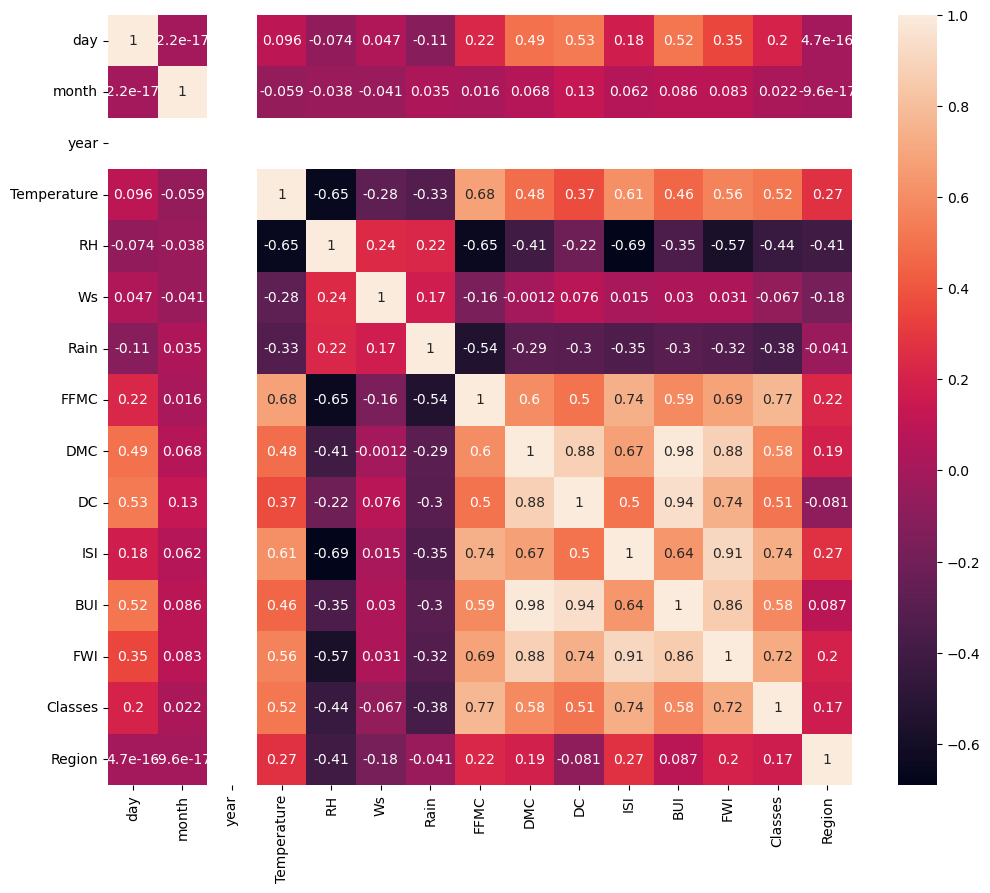

In [4]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(),annot = True)

In [5]:
# sns.pairplot(df)

In [6]:
# there are multiple features 

df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.02377,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.42746,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.00000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.70000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.20000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.37500,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.10000,1.000000,1.000000


In [7]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


In [8]:
#### Here i know month is an important factor when trying to predict the fire 
#### but since it my model will predicit the linear distance which will give the wrong information that's why 
#### I need to convert it into cyclic order because jan and december are close to each other 
#### it's an important factor don't miss here

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,month_sin,month_cos
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,1.224647e-16,-1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,1.224647e-16,-1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,1.224647e-16,-1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,1.224647e-16,-1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,1.224647e-16,-1.0


In [10]:
# here i can drop the day (because just a category doesn't carry any meaning) and year( because of low corr)
# and i have already used the month column here

dff = df.drop(columns=['day', 'month', 'year'])

In [11]:
dff

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,month_sin,month_cos
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,1.224647e-16,-1.000000e+00
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,1.224647e-16,-1.000000e+00
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,1.224647e-16,-1.000000e+00
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,1.224647e-16,-1.000000e+00
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1,-1.000000e+00,-1.836970e-16
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1,-1.000000e+00,-1.836970e-16
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1,-1.000000e+00,-1.836970e-16
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1,-1.000000e+00,-1.836970e-16


In [12]:
dff.isnull().sum()  # all the data is here done

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
month_sin      0
month_cos      0
dtype: int64

In [13]:
dff['Classes'].value_counts(normalize= True) 

Classes
1    0.565574
0    0.434426
Name: proportion, dtype: float64

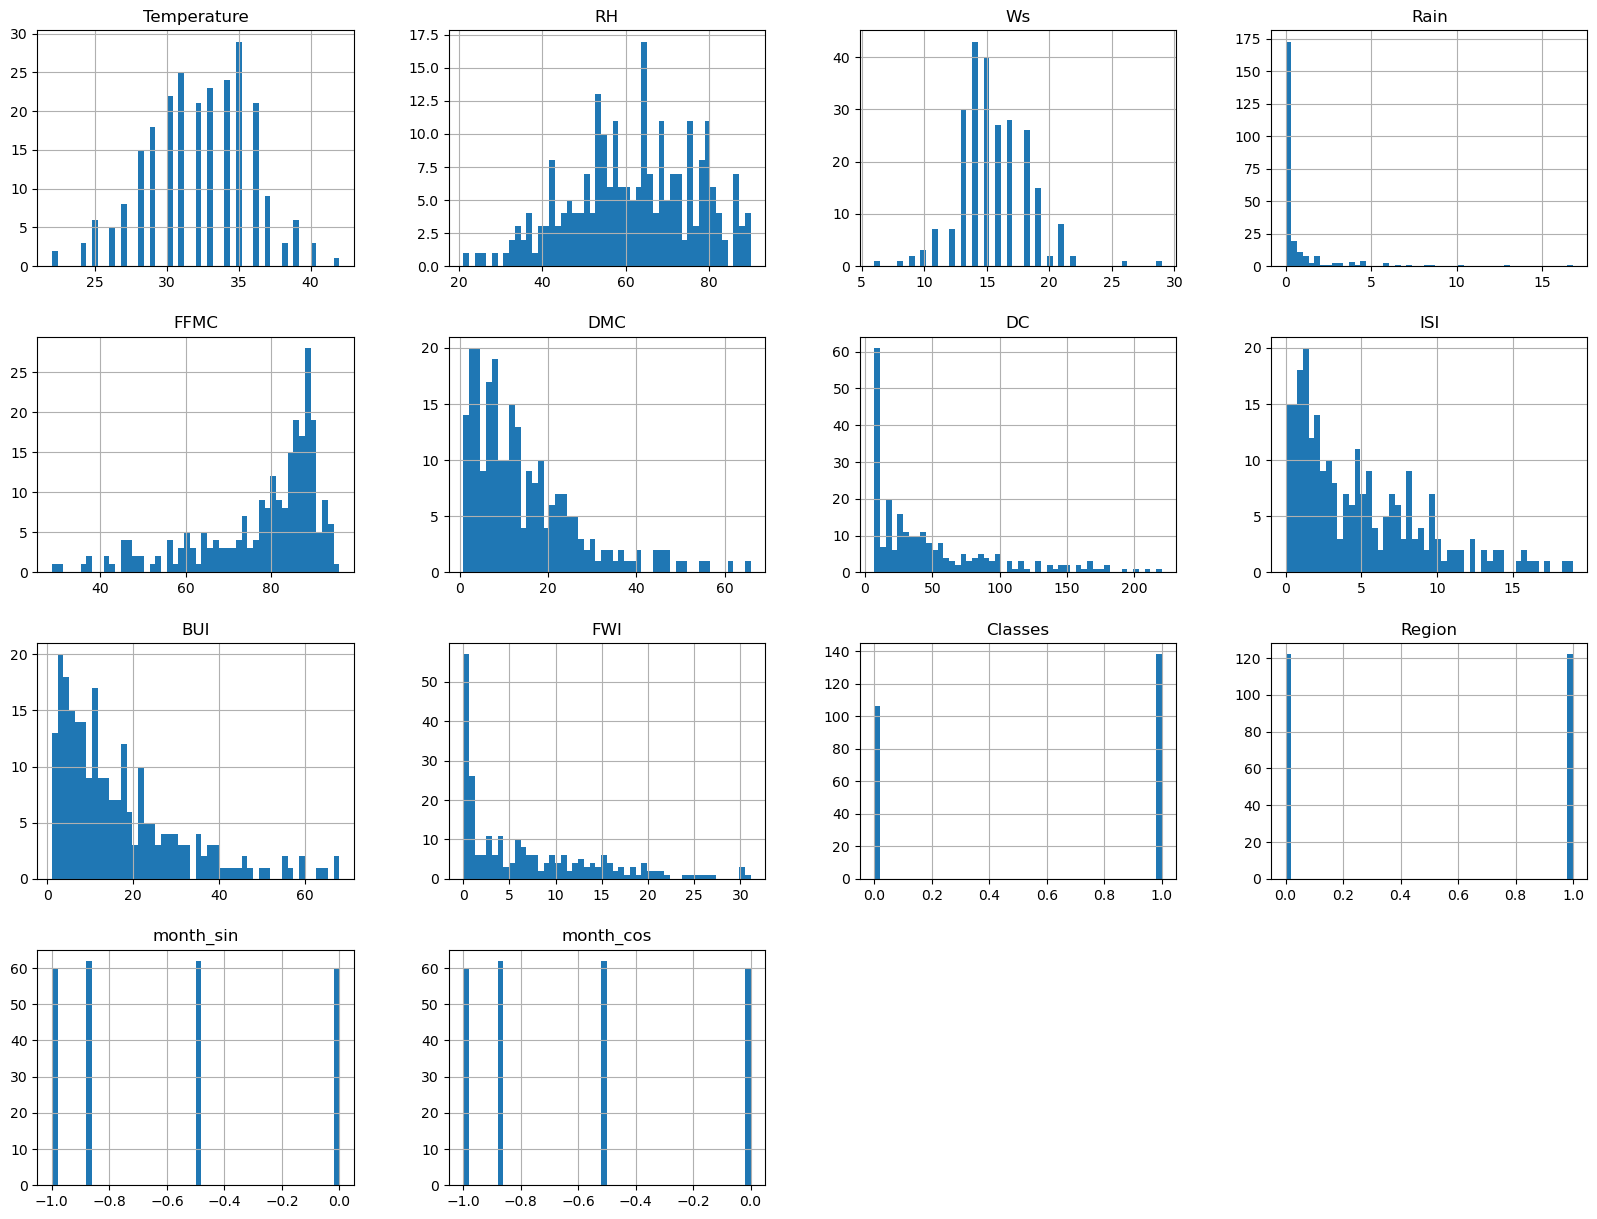

In [14]:
dff.hist(bins= 50, figsize= (20,15))
plt.show()

<Axes: >

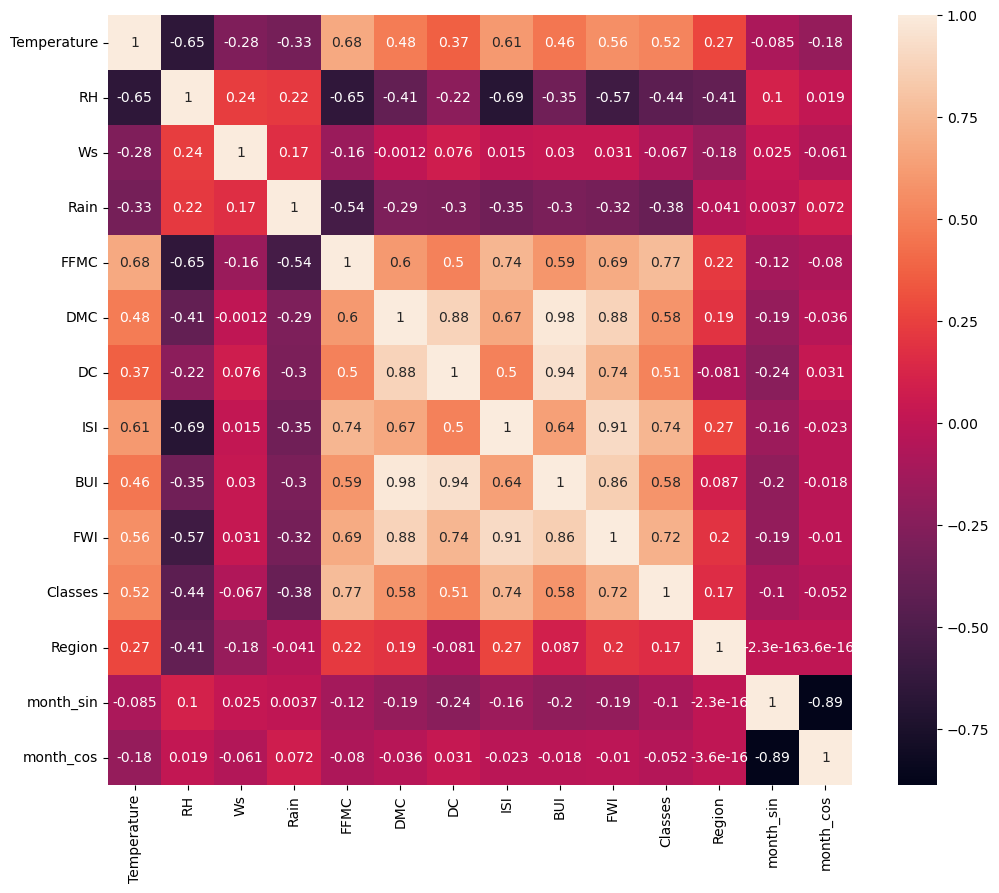

In [15]:
plt.figure(figsize = (12,10))

sns.heatmap(dff.corr(), annot= True)

Text(0.5, 1.0, 'Fire incidence occured in the SIDI BEL regions')

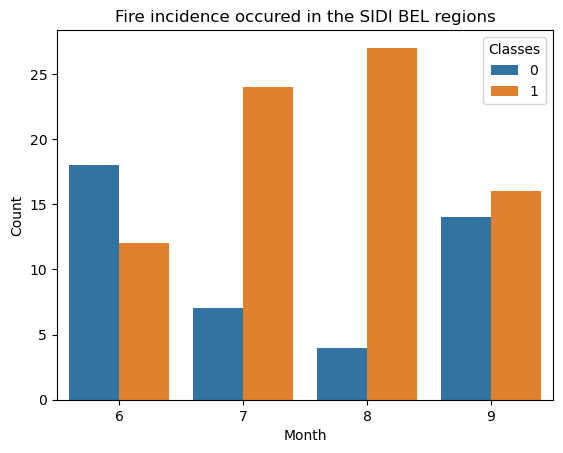

In [16]:
# let's dry to analyse the relation between different month and classes

dftemp = df.loc[df['Region'] == 1]

sns.countplot(data= dftemp, x = 'month', hue= 'Classes')

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Fire incidence occured in the SIDI BEL regions")

Text(0.5, 1.0, 'Fire incidence occured in the BAJAIA regions')

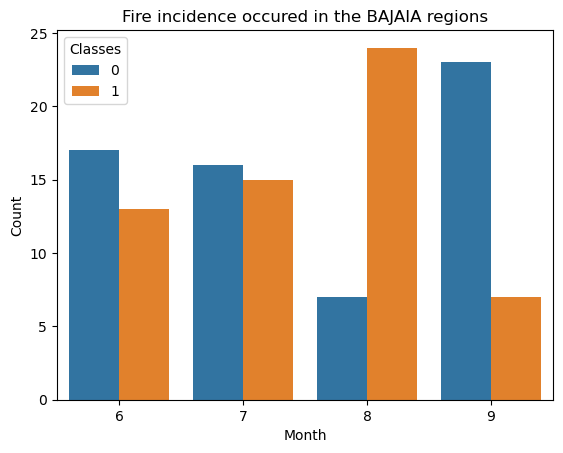

In [17]:
dftemp = df.loc[df['Region'] == 0]

sns.countplot(data= dftemp, x = 'month', hue= 'Classes')

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Fire incidence occured in the BAJAIA regions")

In [18]:
# so here we can observe that most of the incidence and taken place in the month 8 that is August

# Model Traning here 

In [19]:
# first identifying the model features and target



X = dff.drop(columns=['FWI'])
y = dff['FWI']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.25, random_state= True)

<Axes: >

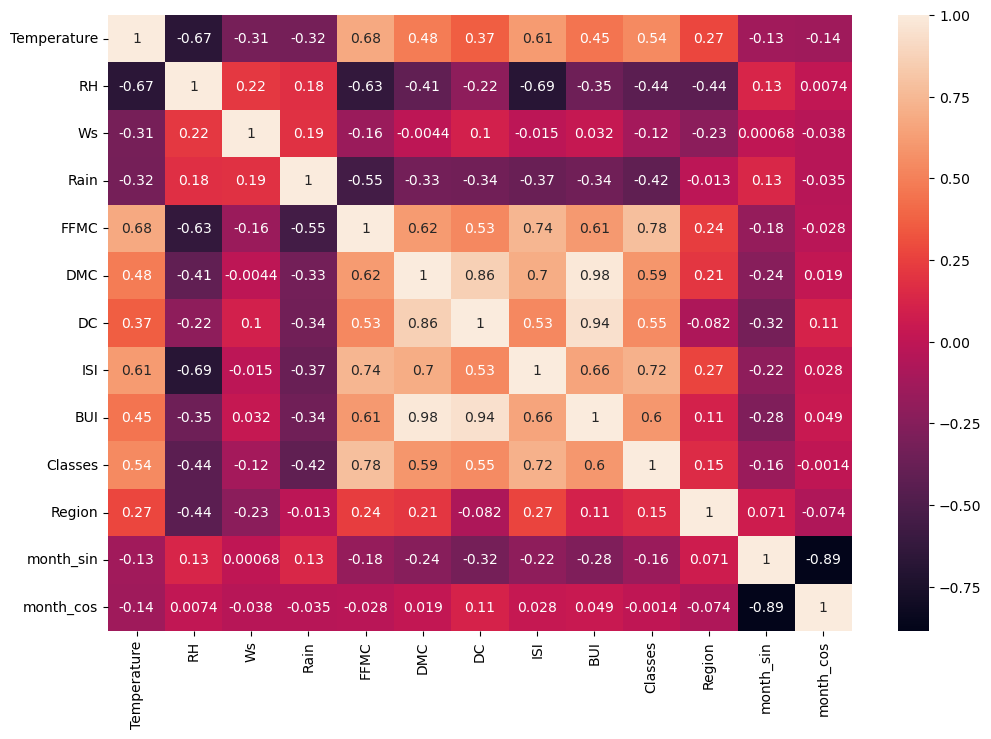

In [21]:
plt.figure(figsize= (12,8))
sns.heatmap(X_train.corr(), annot = True)

In [22]:
# there are many features features that highly depend on each other i need to remove then 
# to avoid the multicollinearity 


# here is the program for that purpose

def correlation(dataset, threshold):
    corr_col = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                corr_col.add(corr_matrix.columns[i])

    return corr_col

In [23]:
remove_columns = correlation(X_train, 0.85)

In [24]:
remove_columns

{'BUI', 'DC'}

In [25]:
# let's remove these columns to avoid multicollinearity in the model

X_train.drop(columns=remove_columns, inplace= True)
X_test.drop(columns=remove_columns, inplace= True)

In [26]:
X_train.shape

(183, 11)

In [27]:
X_test.shape

(61, 11)

In [28]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region,month_sin,month_cos
236,35,56,14,0.0,89.0,29.4,7.5,1,1,-1.000000e+00,-1.836970e-16
169,33,68,15,0.0,86.1,23.9,5.2,1,1,-5.000000e-01,-8.660254e-01
78,36,54,18,0.0,89.4,20.0,9.7,1,0,-8.660254e-01,-5.000000e-01
47,31,68,14,0.0,85.4,12.1,4.6,1,0,-5.000000e-01,-8.660254e-01
194,39,21,17,0.4,93.0,18.4,15.5,1,1,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...
137,29,87,15,0.4,47.4,4.2,0.2,0,1,1.224647e-16,-1.000000e+00
72,35,51,13,0.3,81.3,15.6,2.5,0,0,-8.660254e-01,-5.000000e-01
140,32,67,14,4.5,64.6,4.4,1.0,0,1,1.224647e-16,-1.000000e+00
235,33,64,13,0.0,88.9,26.1,7.1,1,1,-1.000000e+00,-1.836970e-16


In [29]:
# let's train the model first and then we will figure the rest of the problem 


In [30]:
# standard scaling


from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: title={'center': 'Values with Scaling'}>

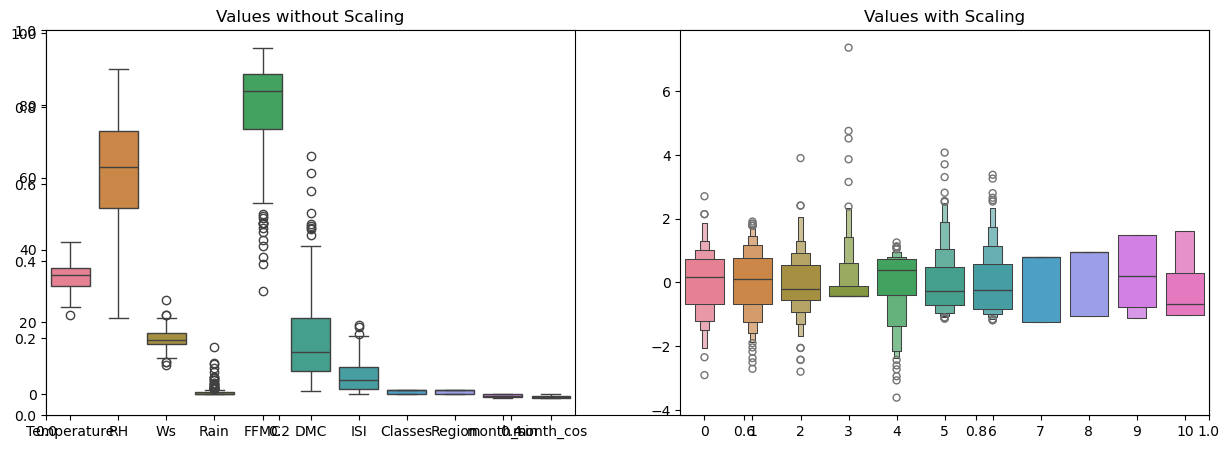

In [31]:
# let's visulaise how clearly this makes difference here 

# using the box plot
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)

plt.title("Values without Scaling")
sns.boxplot(X_train)


plt.subplot(1,2,2)

plt.title("Values with Scaling") # here you can observe these are on the same plot 
sns.boxenplot(X_train_scaled)

In [32]:
# Now, Let's train the model here 

from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train_scaled, y_train)


LinearRegression()

In [33]:
y_pred = regression.predict(X_test_scaled)

In [34]:
from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(y_true=y_test, y_pred= y_pred)
score = r2_score(y_true=y_test, y_pred=y_pred)

In [35]:
print(rmse)  # the error is too low here

1.0206064931088124


In [36]:
print(score) # here you can see the accuracy is quite high, and chances are there that our model is overfitting here 

0.9792342672991001


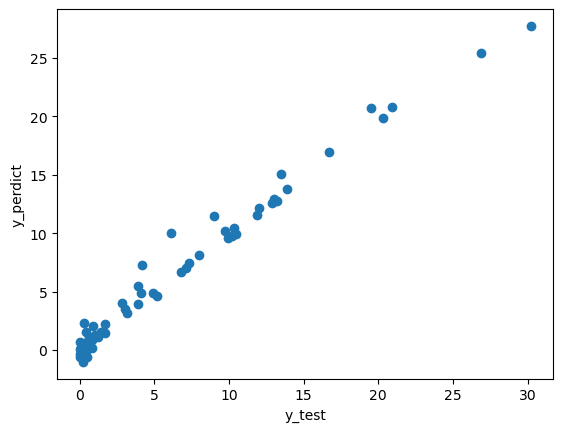

In [37]:
plt.scatter(y_test, y_pred) # this graph is linear means our model has learned well here 

plt.xlabel("y_test")
plt.ylabel("y_perdict")

plt.show()

In [38]:
# what can you we do to avoid the overfitting here?
# we don't want our model to not work on the real data that's why we will avoid overfitting of data here

# Lasso Regression 
To avoid the overfitting here 

In [39]:
from sklearn.linear_model import Lasso

from sklearn.metrics import root_mean_squared_error, r2_score

lasso_reg = Lasso()

lasso_reg.fit(X_train_scaled, y_train)

Lasso()

In [40]:
y_pred = lasso_reg.predict(X_test_scaled)

In [41]:
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

In [42]:
print(rmse)  # the error has increased to avoid the overfitting here 
print(score)  # and r2 score has decreases 
# that's what we want here 

1.6354499321347673
0.9466781619289152


In [43]:
# here let's do the cross validation here as well

from sklearn.linear_model import LassoCV

lass_cv = LassoCV() # here by default cv = 5

lass_cv.fit(X_train_scaled,y_train)

LassoCV()

In [44]:
lass_cv.alpha_

np.float64(0.051759565511143454)

In [45]:
lass_cv.mse_path_ # how the lasso is penalising the values here 
# pherhaps you might not have learnt these things yet 

array([[85.63443013, 41.02778771, 48.06242038, 71.13919362, 29.18318566],
       [85.63443013, 35.88773992, 41.87033284, 68.99094754, 26.2290468 ],
       [82.87932234, 31.41332685, 36.56677512, 62.17854343, 22.97399885],
       [74.6404098 , 27.51809544, 32.03046604, 56.1848542 , 20.14065312],
       [67.39970638, 24.12683652, 28.15639059, 49.70748023, 17.67454515],
       [61.03224352, 21.17416283, 24.85334113, 43.87678256, 15.52780092],
       [54.23427802, 18.60314547, 22.04264366, 38.77898246, 13.65894756],
       [47.53088022, 16.36425564, 19.65590128, 34.32099775, 12.03172188],
       [41.68878138, 14.41444967, 17.63399387, 30.42085027, 10.61513127],
       [36.59790566, 12.71622924, 15.9255931 , 27.00741906,  9.38165394],
       [32.1605355 , 11.2369854 , 14.48679898, 24.01837838,  8.30753335],
       [28.29219688,  9.94834573, 13.27917863, 21.40051781,  7.37210106],
       [24.91937543,  8.82561669, 12.2696714 , 19.10637413,  6.55737482],
       [21.97809149,  7.84733352, 11.4

In [46]:
y_predict = lass_cv.predict(X_test_scaled)

In [47]:
rmse = root_mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)

In [48]:
print(rmse)
print(score)

1.0888884333771809
0.9763627268119518


# Ridge Regression Model here

In [49]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()

ridge_reg.fit(X_train_scaled, y_train)

Ridge()

In [50]:
y_predict = ridge_reg.predict(X_test_scaled)

In [51]:
rmse = root_mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print(rmse)
print(score)

1.023619002952201
0.9791114985358982


In [52]:
from sklearn.linear_model import RidgeCV

ridge_reg_cv = RidgeCV(cv= 5)

ridge_reg_cv.fit(X_train_scaled, y_train)
y_predict = ridge_reg_cv.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print(rmse)
print(score)

1.1091647661361284
0.9754742252107651


# Elasticnet Regression
It is the combination of the lasso and ridge regreesion

2.2847723310568115
0.8959321776419823


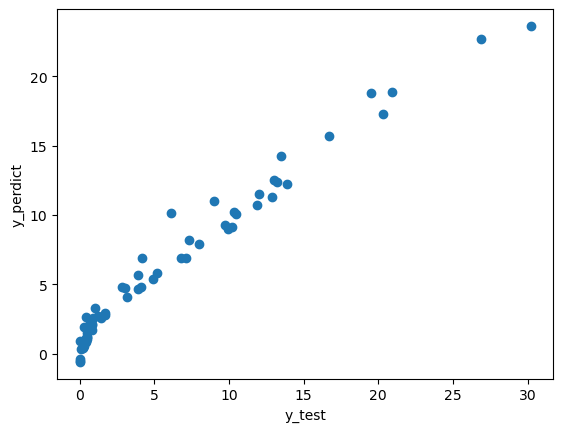

In [53]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

elastic_net.fit(X_train_scaled, y_train)
y_predict = elastic_net.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print(rmse)
print(score)


# plotting to have better understading here
plt.scatter(y_test, y_pred) # this graph is linear means our model has learned well here 

plt.xlabel("y_test")
plt.ylabel("y_perdict")

plt.show()

# it's has decrease the overfitting quite a lot

1.080651826233277
0.9767189700841711


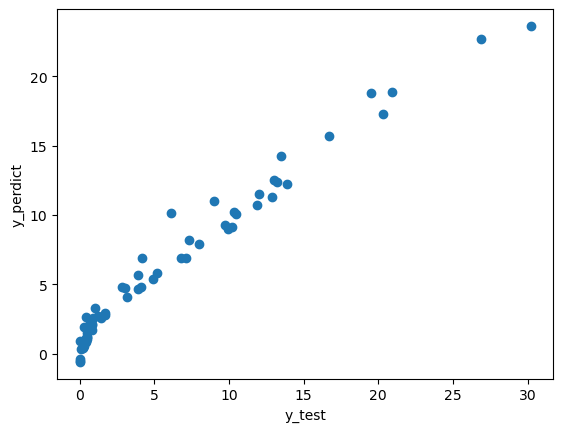

In [54]:
from sklearn.linear_model import ElasticNetCV

elastic_net_cv = ElasticNetCV(cv = 5)

elastic_net_cv.fit(X_train_scaled, y_train)
y_predict = elastic_net_cv.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print(rmse)
print(score)


# plotting to have better understading here
plt.scatter(y_test, y_pred) # this graph is linear means our model has learned well here 

plt.xlabel("y_test")
plt.ylabel("y_perdict")

plt.show()


# this Marks the end of our model

There are various other things to complete this model into use version but still 
We have train the model for the time being.

In [55]:
# before that let me the test the model here for better understanding here

X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region,month_sin,month_cos
236,35,56,14,0.0,89.0,29.4,7.5,1,1,-1.000000e+00,-1.836970e-16
169,33,68,15,0.0,86.1,23.9,5.2,1,1,-5.000000e-01,-8.660254e-01
78,36,54,18,0.0,89.4,20.0,9.7,1,0,-8.660254e-01,-5.000000e-01
47,31,68,14,0.0,85.4,12.1,4.6,1,0,-5.000000e-01,-8.660254e-01
194,39,21,17,0.4,93.0,18.4,15.5,1,1,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...
137,29,87,15,0.4,47.4,4.2,0.2,0,1,1.224647e-16,-1.000000e+00
72,35,51,13,0.3,81.3,15.6,2.5,0,0,-8.660254e-01,-5.000000e-01
140,32,67,14,4.5,64.6,4.4,1.0,0,1,1.224647e-16,-1.000000e+00
235,33,64,13,0.0,88.9,26.1,7.1,1,1,-1.000000e+00,-1.836970e-16


In [57]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region', 'month_sin', 'month_cos'],
      dtype='object')

In [58]:
y_train

236    15.2
169     9.1
78     16.1
47      6.0
194    18.8
       ... 
137     0.1
72      4.2
140     0.4
235    13.7
37      8.0
Name: FWI, Length: 183, dtype: float64

In [ ]:
# let's save the model file here fro future use 

import pickle

# i am taking here the 
pickle.dump(ridge_reg, open('ridge.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# so here my models are created now i will try to diploy this model in the frame 